<a href="https://colab.research.google.com/github/JaradAng/tensorflow_training/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install neograd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 1.0 MB/s 


In [2]:
import tensorflow as tf
from sklearn.datasets import make_circles

#MAke 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)


In [3]:
#checking features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#Check the lables 
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import matplotlib.pyplot as plt
import pandas as pd



In [6]:
circles = pd.DataFrame({'X0': X[:, 0], 'X1':X[:,1], 'label': y})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


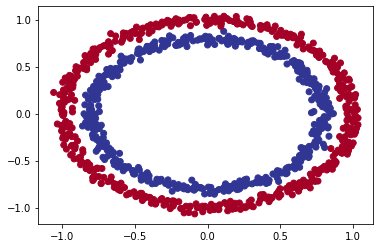

In [7]:
plt.scatter(X[:, 0], X[:,1], c=y, cmap = plt.cm.RdYlBu)

In [8]:
#Check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
#how many samples
len(X), len(y)

(1000, 1000)

In [10]:
#View first example of each
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# X_train, X_test, y_train, y_test, test

In [13]:
#build in modeling
tf.random.set_seed(42)
model = tf.keras.Sequential([
    # tf.keras.input_shape(),
    # tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

#fit the model
model.fit(tf.expand_dims(X,axis=1), y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 4s 5ms/step - loss: 4.2948 - accuracy: 0.4997
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 4.1731 - accuracy: 0.5002
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 4.1752 - accuracy: 0.4979
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 4.0434 - accuracy: 0.4978
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 3.9941 - accuracy: 0.4955


In [14]:
model.fit(X, y, epochs=200, verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4790


[0.6931518912315369, 0.4790000021457672]

In [15]:
#Since we are working on binary classication model and we have 50% accuracy. its preforming as its guessing. so lets add an extra layer
tf.random.set_seed(42)

#build model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

#Compile
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#fit the model
model2.fit(X,y, epochs = 100, verbose=0)

In [16]:
model2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4970


[0.6931824088096619, 0.4970000088214874]

In [17]:
#trying to improve more
tf.random.set_seed(42)

#build
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

#Fit
model3.fit(X,y,epochs=500)

Epoch 1/500
32/32 [==============================] - 0s 3ms/step - loss: 1.0162 - accuracy: 0.4800
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5010
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.4750
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4940
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5030
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5240
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.4930
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.5160
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.4840
Epoch 10/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4680
Epoch 11/

In [18]:
import numpy as np

In [19]:
# #function to viz model predictions, create meshgrid, make predictoins, and plot predictions as well as a line between each zone
# def plot_decision_boundary(model, X, y):
#   """
#   plots decision boundary created by a model predicting on X
#   """

#   #define axis boundaries and create meshgrid
#   x_min, x_max = X[:,0].min()- 0.1, X[:,0].max() + 0.1
#   y_min, y_max = X[:,1].min()- 0.1, X[:,1].max() + 0.1

#   xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                        np.linspace(y_min, y_max, 100))
  
#   #create X value to make predictions
#   x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2d arrays together

#   #Make predicitions
#   y_pred = model.predict(x_in)

#   #check for multiclass
#   if len(y_pred[0]) > 1:
#     print('doing multiclass classification')
#     # we have to reshape out predicition to get them ready for plotting
#     y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
#   else:
#     print('Doing binary classification')
#     y_pred = np.round(y_pred).reshape(xx.shape)

#   #plot the decision boundary
#   plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
#   plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
#   plt.xlim(xx.min(), xx.max())
#   plt.ylim(yy.min(), yy.max())



In [20]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


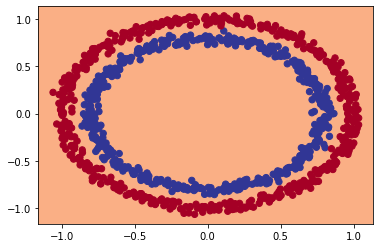

In [21]:
#checking out prediction the model is making
plot_decision_boundary(model=model3,
                       X=X,
                       y=y)

In [22]:
#Lets try on some regression data
tf.random.set_seed(42)

X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100,1100, 5) #y=x+100

X_regression, y_regression

#split train and test
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#fit the model
# model3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)
# model3.fit(X_reg_train, y_reg_train, epochs=100)

We need to switch from classicification compiler to regression 
need to change model to suit the data


In [23]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile
model4.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['mae'])

#Fit the model
model4.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9375 - mae: 45.9375
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 4ms/step


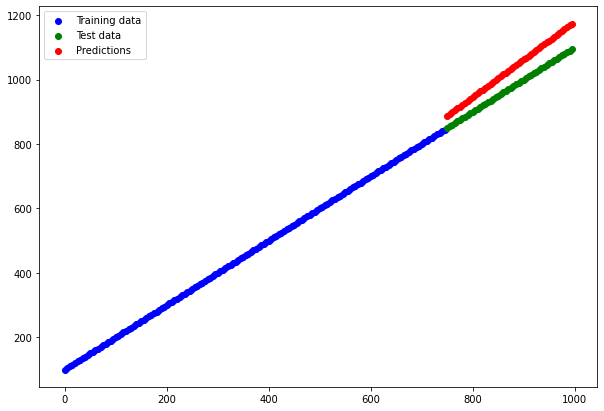

In [24]:
# make a pred on trained model
y_reg_preds = model4.predict(X_reg_test)

#Plot the models predictions
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b',label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label ='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')

plt.legend();

In [25]:
#lets build no linearity model
tf.random.set_seed(42)

#build model
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    # tf.keras.layers.Dense(10),
    # tf.keras.layers.Dense(1)
])

#compile the model
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

#fit the model
history = model5.fit(tf.expand_dims(X, axis=1), y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 4.2948 - accuracy: 0.4997
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1731 - accuracy: 0.5002
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1752 - accuracy: 0.4979
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0434 - accuracy: 0.4978
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9941 - accuracy: 0.4955
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9651 - accuracy: 0.4977
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9407 - accuracy: 0.4963
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8627 - accuracy: 0.4985
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8099 - accuracy: 0.4978
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6609 - accuracy: 0.4998
Epoch 11/100
32/32 [=

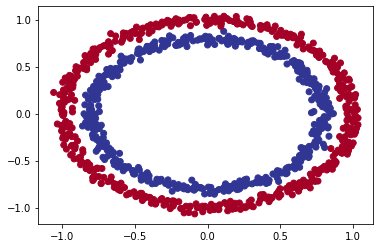

In [26]:
#check data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


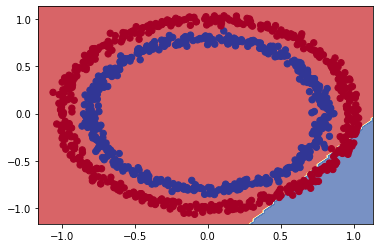

In [27]:
plot_decision_boundary(model=model5,X=X,y=y)

In [28]:
#Actaully non linear model this time
tf.random.set_seed(42)

#model
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])

#Compile the model
model6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

#fit
history = model6.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.7030 - accuracy: 0.4951
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1184 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7192 - accuracy: 0.4969
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7032 - accuracy: 0.5028
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.4992
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4972
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4982
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4971
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4904
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4989
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


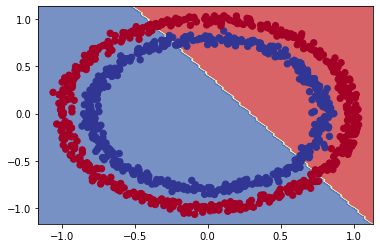

In [29]:
plot_decision_boundary(model=model6, X=X, y=y)

In [30]:
from pandas.core.reshape.melt import lreshape
#really make it non linear
tf.random.set_seed(42)

#build
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

#compile
model7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

#fit
history1 = model7.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


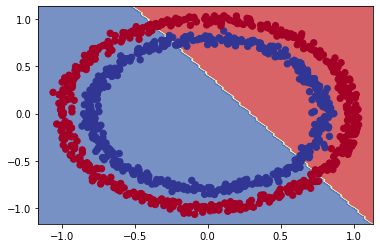

In [31]:
plot_decision_boundary(model=model6, X=X, y=y)

In [32]:
 #final model
tf.random.set_seed(42)

#build model
model8= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

#compile
model8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

#fit
model8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


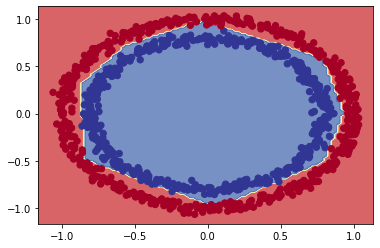

In [33]:
plot_decision_boundary(model=model8,
                       X=X,y=y)

the combination of linear and non linear is one of the key fundamentals of nueral networks


In [34]:
#create toy tensor similar to the data in modle
A=tf.cast(tf.range(-10,10), tf.float32)

In [35]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

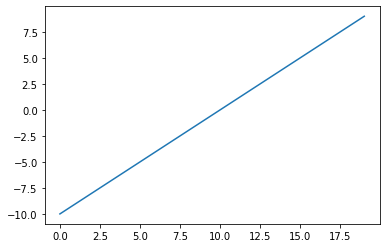

In [36]:
#visualizer toy tensor
plt.plot(A)

In [37]:
def sigmoids(x):
  return 1 / (1 +tf.exp(-x))

In [38]:
sig_a= sigmoids(A)

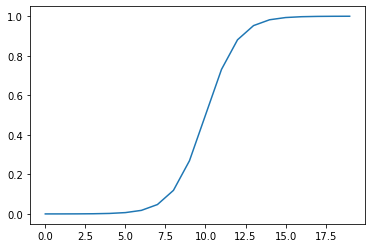

In [39]:
plt.plot(sig_a)

In [40]:
def relu(x):
  return tf.maximum(0,x)

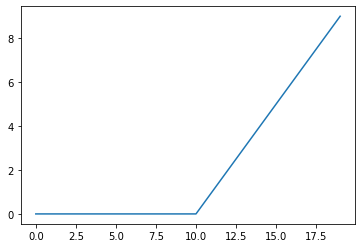

In [41]:
plt.plot(relu(A))

In [42]:
#lets split the data
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [43]:
#build model on train
tf.random.set_seed(42)

#build
model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile
model9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

#fit the model
history = model9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [44]:
model9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468847632408142, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


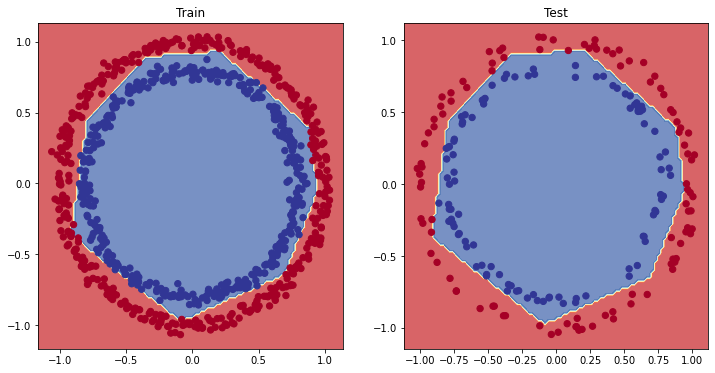

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model=model9, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model=model9, X=X_test, y=y_test)

In [46]:
#plot the loss curves
#history tracks the epochs
history.history

{'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735945343971252,
  0.6681485772132874,
  0.6632685661315918,
  0.6545671820640564,
  0.6412574648857117,
  0.6264280080795288,
  0.6038308143615723,
  0.5714035034179688,
  0.5404428243637085,
  0.5015037059783936,
  0.4683317542076111,
  0.41130149364471436,
  0.36250579357147217,
  0.3209042251110077,
  0.2847078740596771,
  0.2597198784351349,
  0.23746894299983978,
  0.21351955831050873,
  0.19382022321224213,
  0.17524360120296478,
  0.16189301013946533,
  0.1549890637397766,
  0.1489727944135666],
 'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.96

In [47]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'model loss curves')

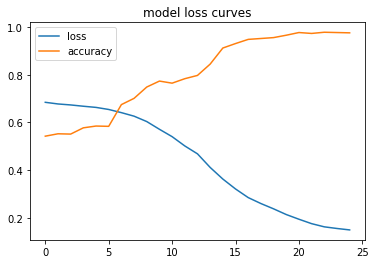

In [48]:
#plot the loss curve
pd.DataFrame(history.history).plot()
plt.title('model loss curves')

The loss function going down means the model is improving. the predictions are getting closer to true observations

#finding the best learning rate

to find the ideal learning rate where it decreases the most during training . we are going to use the following steps.

1. learning rate call back - think of callback as extra piece of functionality you can add to your model while its training
2. going to use a modified loss curve plot building off the curve above. 


In [49]:
#create new model
tf.random.set_seed(42)

#Build model
model10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Compile the model
model10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))


#fit the model
history10 = model10.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

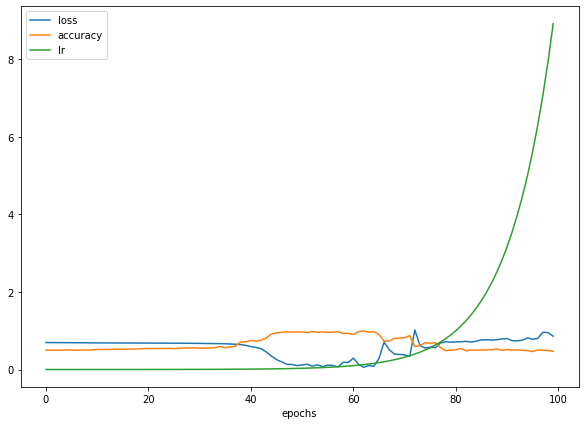

In [50]:
#check out history
pd.DataFrame(history10.history).plot(figsize=(10,7),xlabel='epochs')

Text(0, 0.5, 'Loss')

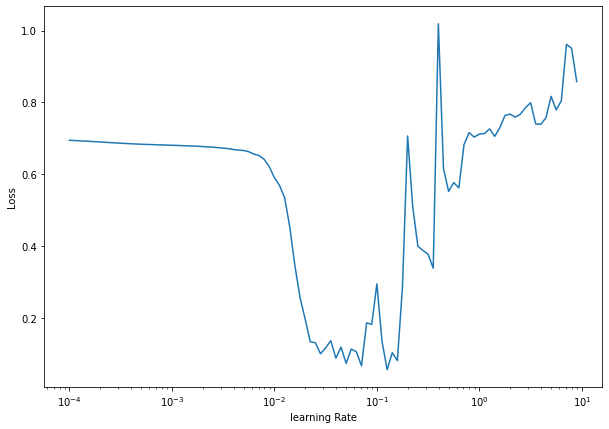

In [51]:
#plot learning rate vs the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
# lrs
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history10.history['loss'])
plt.xlabel('learning Rate')
plt.ylabel('Loss')

In [52]:
 #the graph above makes it look like optimal learning rate is 0.02
tf.random.set_seed(42)

 #build
model11 = tf.keras.Sequential([
     tf.keras.layers.Dense(4, activation = 'relu'),
     tf.keras.layers.Dense(4, activation = 'relu'),
     tf.keras.layers.Dense(1, activation = 'sigmoid')
 ])

#compile the model
model11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

#fit 
history11 = model11.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [53]:
model11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.057401809841394424, 0.9900000095367432]

In [54]:
model9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468847632408142, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


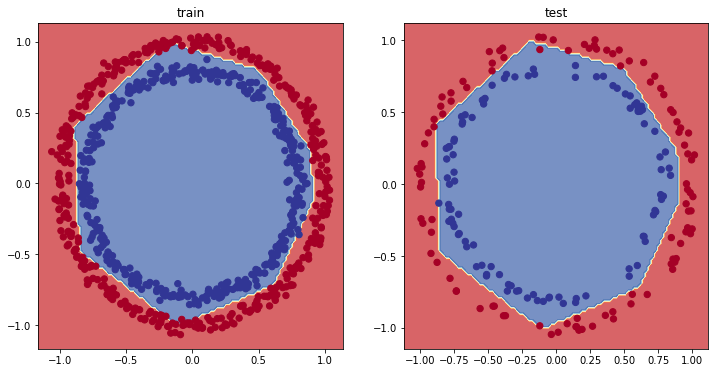

In [55]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model =model11, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model=model11, X=X_test, y=y_test)

In [56]:
#Checking the accuracy
loss, accuracy = model11.evaluate(X_test, y_test)
print(f'model loss on the test set: {loss}')
print(f'model accuracy on the test set: {(accuracy *100): .2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
model loss on the test set: 0.057401809841394424
model accuracy on the test set:  99.00%


In [57]:
#build a confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = model11.predict(X_test)

#create matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

Y preds is in probability form, the standard output or softmax activation functions is in probability form. I will convert them

In [58]:
#looking at preds
y_preds[:10]

array([[9.8526543e-01],
       [9.9923790e-01],
       [9.9032342e-01],
       [9.9706942e-01],
       [3.9622831e-01],
       [1.8126843e-02],
       [9.6829069e-01],
       [1.9746652e-02],
       [9.9967170e-01],
       [5.6459074e-04]], dtype=float32)

In [59]:
#convert to binanary
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [60]:
rounded_preds = tf.round(y_preds)

In [61]:
confusion_matrix(y_test, rounded_preds)

array([[99,  2],
       [ 0, 99]])

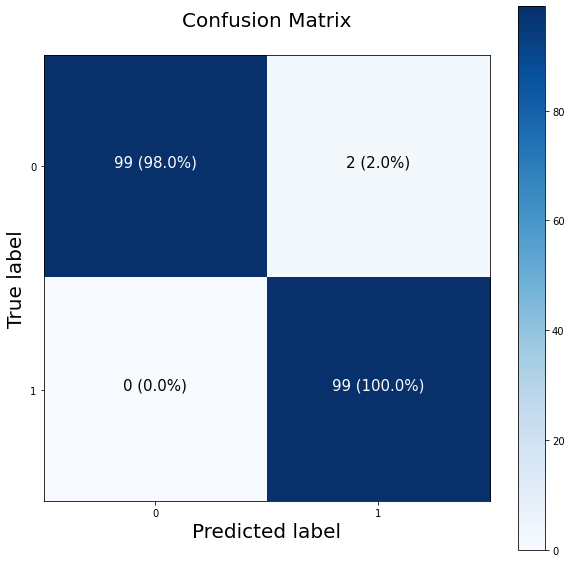

In [63]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)
  

### moving into multiclass classification

when there are more than two classes its known as multiclass classification

https://github.com/zalandoresearch/fashion-mnist

In [64]:
from tensorflow.keras.datasets import fashion_mnist

In [65]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [66]:
#show the first training example
print(f'training sample: {train_data[0]}, {train_labels[0]}')

training sample: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

This represents training label 9, there are 10 different 

In [67]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

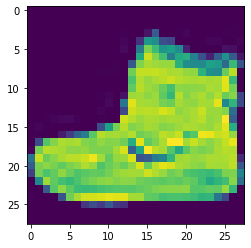

In [68]:
#plot a single sample
plt.imshow(train_data[0]);

In [69]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

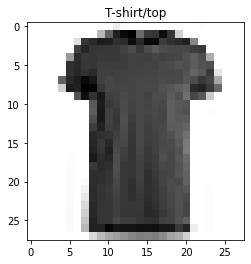

In [70]:
#plot and example and label

index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

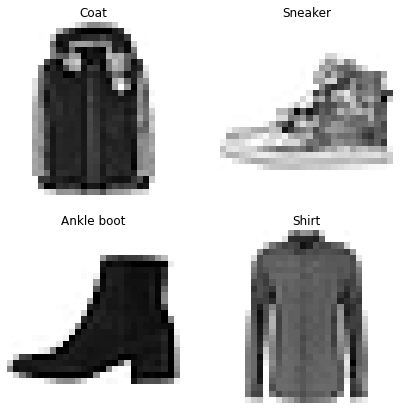

In [71]:
#plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### building a multi class

can use a similar model but with some few tweaks

*input shape = 28,28 --the shape of one image

*output shape = 10 -- one per class of clothing

*loss functions is categorical crossentropy

*output activation is softmax

In [72]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [73]:
 #lets build a multiclass model
tf.random.set_seed(42)

model12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #flatten layer flattens the input which basically multiplies the shape. goes from 28x28 to 784
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#compile
model12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

#fit
non_norm_history = model12.fit(train_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3443 - accuracy: 0.1011 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3040 - accuracy: 0.0976 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy:

In [74]:
#check the model summary
model12.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [75]:
#checking the min and max
train_data.min(), train_data.max()

(0, 255)

Scaling/normalization is important for neural networks and like the numbers to be between 0-1. now have 0 and 255

1. one way to normalize is to divide by the maximum

In [76]:
from matplotlib import test
#normalize
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

#chck min and max
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [77]:
#build model for nomrm
tf.random.set_seed(42)

#build model
model13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

#compile
model13.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#fit
norm_history = model13.fit(train_data_norm,
                           tf.one_hot(train_labels, depth=10),
                           epochs = 10,
                           validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10))
                           )

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

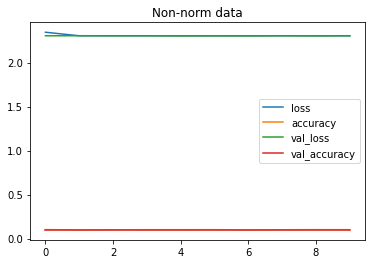

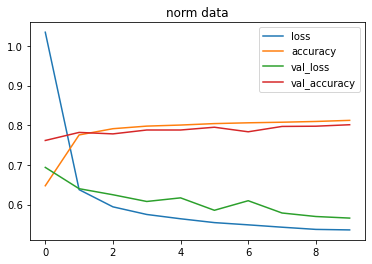

In [78]:
#Plot non norm
pd.DataFrame(non_norm_history.history).plot(title='Non-norm data')

#plot norm data
pd.DataFrame(norm_history.history).plot(title='norm data')

The same data normalized can produce dramatically better results

In [79]:
#find ideal learning rate
tf.random.set_seed(42)

#build model
model14= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compile
model14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


#fit
fit_lr_history = model14.fit(train_data_norm,
                             train_labels,
                             epochs = 40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s